## Wine Quality Prediction


### Documentation

__Objective:__  
Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.  


__Dataset__  
This dataset is publicly available at the UCI Machine Learning Repository and should be cited appropriately when used.

https://archive.ics.uci.edu/dataset/186/wine+quality

The dataset includes data for Portuguese red and white "Vinho Verde" wines, with variables based on physicochemical properties and sensory quality scores. This dataset can be used for classification or regression tasks, though the classes are imbalanced. The dataset featuring red wine is considered.

The dataset contains 12 feature  that includes:  
- Input variables (based on physicochemical tests): 
   1. Fixed acidity: Acidity level that remains after fermentation
   2. Volatile acidity: Acetic acid amount affecting taste
   3. Citric acid: Enhances flavor, adds freshness
   4. Residual sugar: Sugar left after fermentation 
   5. Chlorides: Salt content
   6. Free sulfur dioxide: SO₂ not bound and acts as an antimicrobial
   7. Total sulfur dioxide: Total amount of SO₂ (bound + free)
   8. Density: Wine density, related to alcohol and sugar content
   9. pH: Acidity level
   10. Sulphates: Contributes to microbial stability
   11. Alcohol: Alcohol percentage   

- Output variable (based on sensory data):  
   12. Quality (score between 0 and 10): Sensory quality score (0 to 10)

### Importing Dependencies

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error

### Data Collection

In [108]:
# loading the dataset to pandas dataframe
wine_dataset = pd.read_csv('winequality-red.csv')

### Initial Data Exploration

In [109]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [110]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [111]:
print (wine_dataset.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Data Cleaning

For this dataset, there are no missing values as per the initial exploration and all data types for thsi dataset are appropriate.

In [112]:
# Remove duplicate rows
wine_dataset = wine_dataset.drop_duplicates()

In [113]:
duplicated_data = wine_dataset.duplicated()
print(duplicated_data.sum())

0


### EDA and Visualization

#### 1. Target Variable Analysis

C:\Users\shres\AppData\Local\Temp\ipykernel_11164\3691566298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_dataset, palette='viridis')


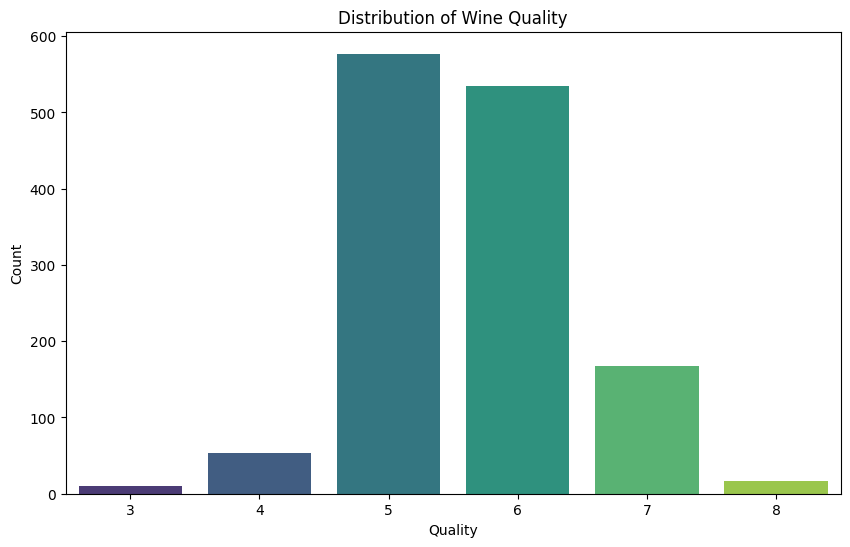

C:\Users\shres\AppData\Local\Temp\ipykernel_11164\3691566298.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_binned', data=wine_dataset, palette='viridis')


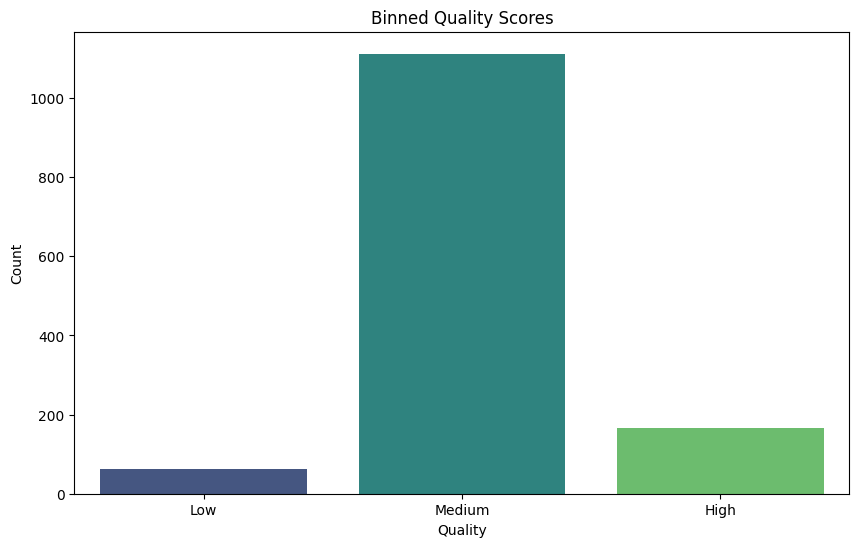

In [114]:
# Distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_dataset, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Binning Quality Scores
bins = [3, 5, 7, 8]
labels = ['Low', 'Medium', 'High']
wine_dataset['quality_binned'] = pd.cut(wine_dataset['quality'], bins=bins, labels=labels, right=False)

# Analyze binned quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_binned', data=wine_dataset, palette='viridis')
plt.title('Binned Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

As per the bar graphs, the quality of wine in the dataset ranges from the score 3 to 8 where most of the wines are of score 5 and then 6. This means most of them are of medium quality.

#### 2. Feature-Target Relationship

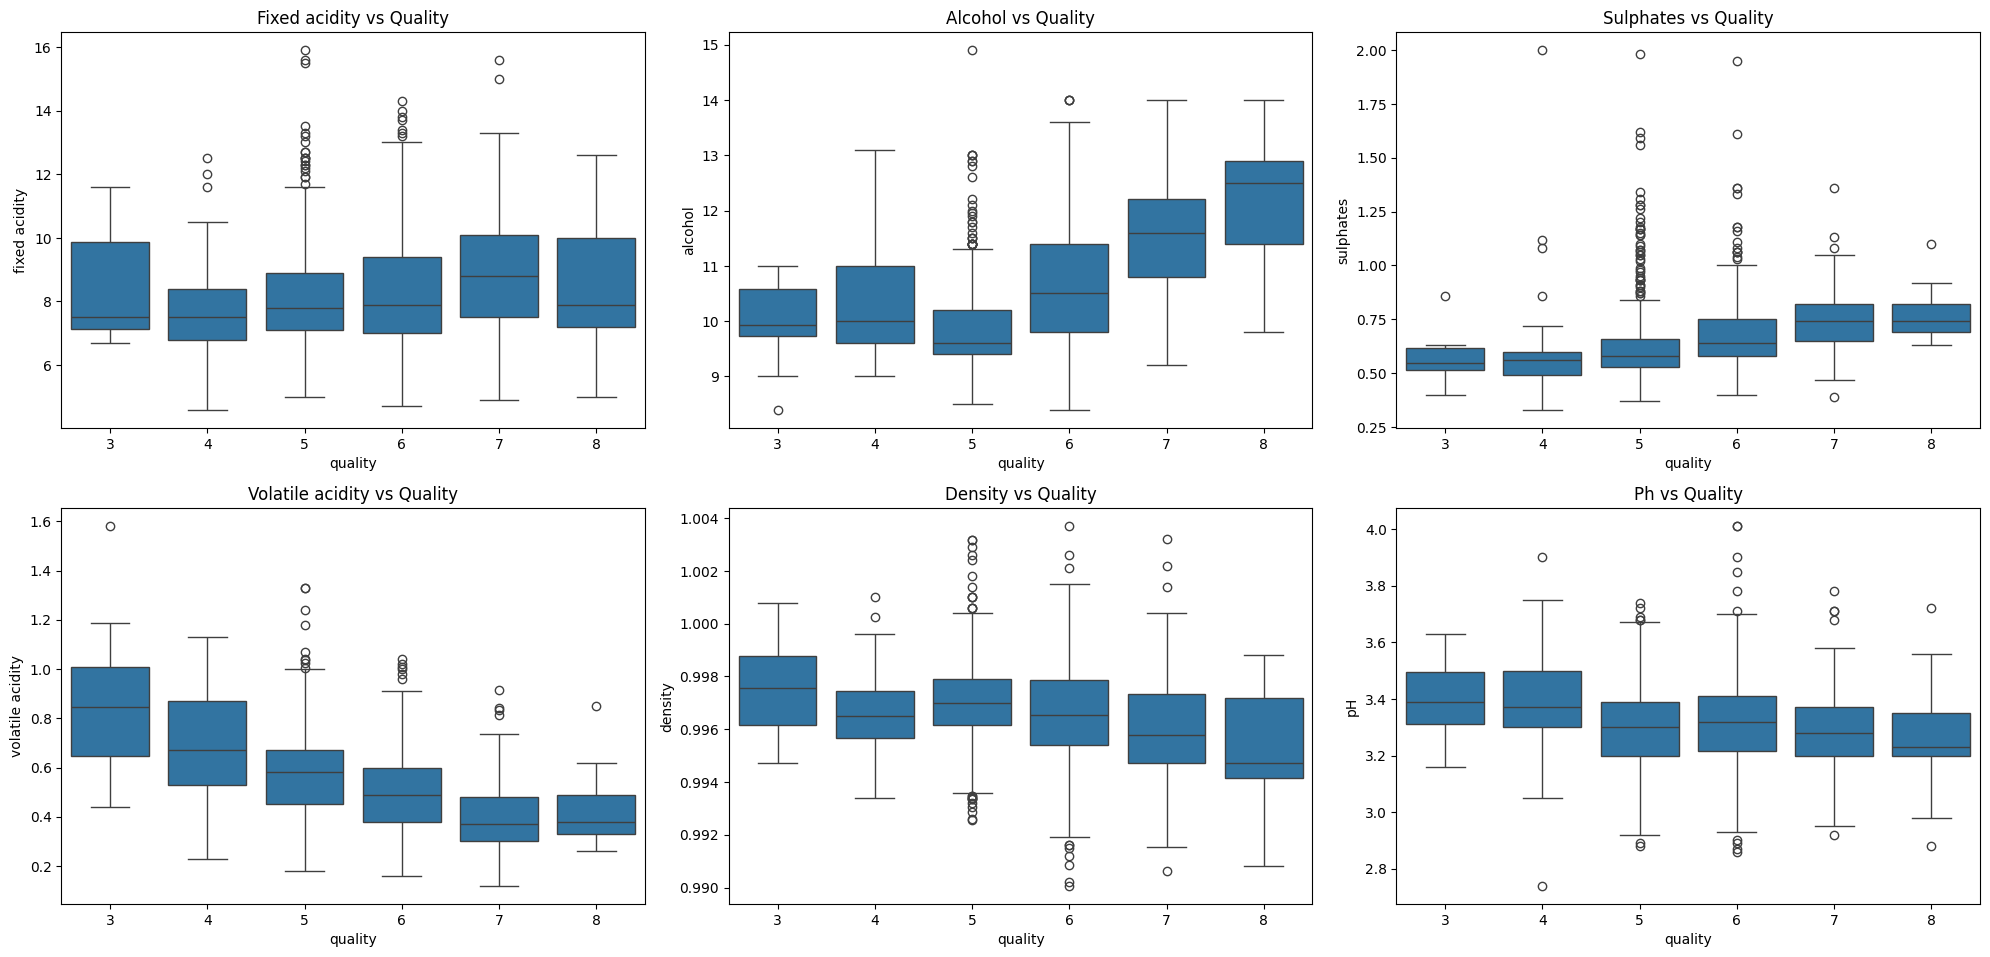

In [115]:
# Key Features vs. Quality
features = ['fixed acidity', 'alcohol', 'sulphates', 'volatile acidity', 'density', 'pH']
plt.figure(figsize=(20, 14))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjusted to 3 rows and 2 columns
    sns.boxplot(x='quality', y=feature, data=wine_dataset)
    plt.title(f'{feature.capitalize()} vs Quality')

plt.tight_layout()
plt.show()

The plot for Fixed Acidity vs Quality shows the distribution of fixed acidity levels across different quality ratings. Fixed acidity seems to vary across quality levels with some outliers present.

The plot of Alcohol vs Quality shows that higher quality wines tend to have higher alcohol content as shown by the upward trend in the median values.

The plot of Sulphates vs Quality show that there is a noticatble increase in sulphate levels as the quality rating increases, mainly for higher quality wines.

The plot of Volatile Acidity vs Quality shows that the lower quality wines tend to have higher volatile acidity which means it is undesirable.

The plot of Density vs Quality shows that there is slight trend where higher quality wines have lower density, however it is not so prominent.

The pH vs Quality plot shows that the pH levels appear relatively stable across different quality rings with some variation but no strong trend.

#### 3. Feature Interactions

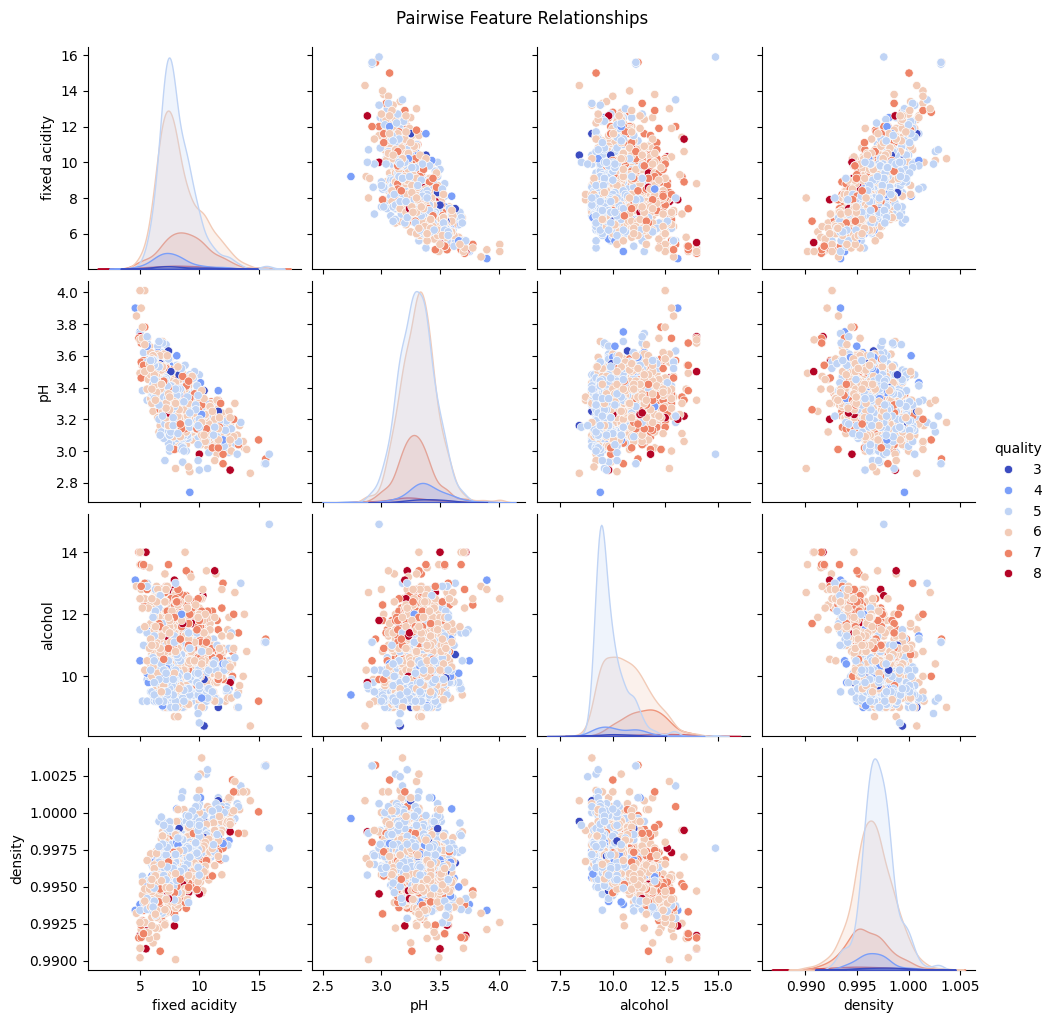

In [116]:
# Pairwise Feature Relationships
sns.pairplot(wine_dataset[['fixed acidity', 'pH', 'alcohol', 'density', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

Observations from this plot:
 * As fixed acidity increases, pH tends to decrease.
 * Fixed acidity and alcohol content are relatively independent of each other in this dataset.
 * Higher fixed acidity tends to be associated with lower density. (negative correlation)
 * Higher alcohol content tends to be associated with lower pH.(negative correlation)
 * As pH increases, density also tends to increase. Higher pH might be associated with wines that have more residual sugar, leading to higher density.
 * Higher alcohol content is associated with lower density. Alcohol is less dense than water, so wines with higher alcohol content will have lower overall density.


#### 4. pH and Acidity Analysis

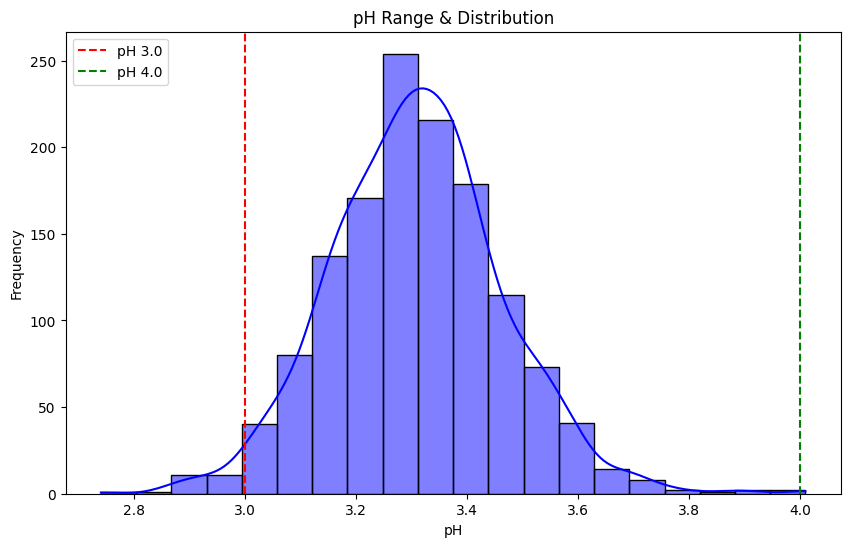

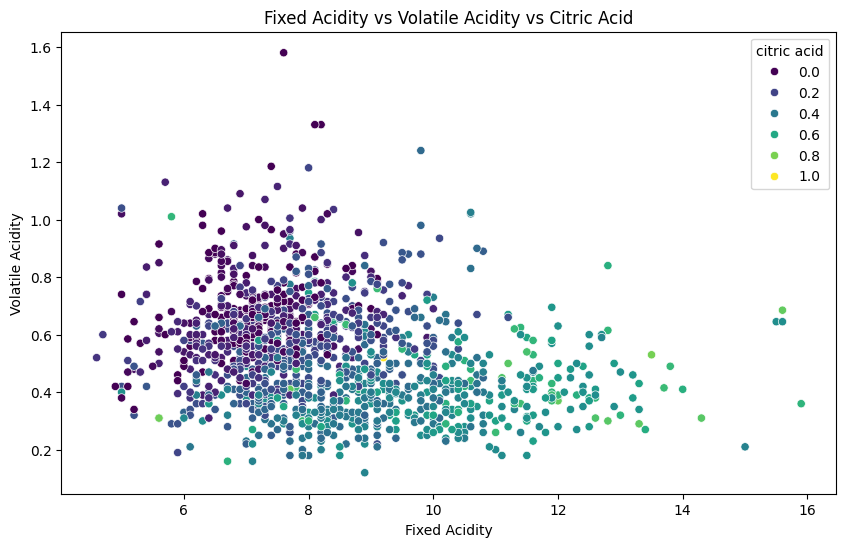

In [117]:
# pH Range & Distribution
plt.figure(figsize=(10, 6))
sns.histplot(wine_dataset['pH'], bins=20, kde=True, color='blue')
plt.axvline(3.0, color='red', linestyle='--', label='pH 3.0')
plt.axvline(4.0, color='green', linestyle='--', label='pH 4.0')
plt.title('pH Range & Distribution')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Acidity Composition Breakdown
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='citric acid', data=wine_dataset, palette='viridis')
plt.title('Fixed Acidity vs Volatile Acidity vs Citric Acid')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

The pH range and distribution graph shows the distribution of pH values within an acidic range (2.8 to 4.0).

The second graph compares three types of acidity that helps to understand the relationships between fixed acidity, volatile acidity and citric acid.

#### 5. Sulfur Dioxide Effects

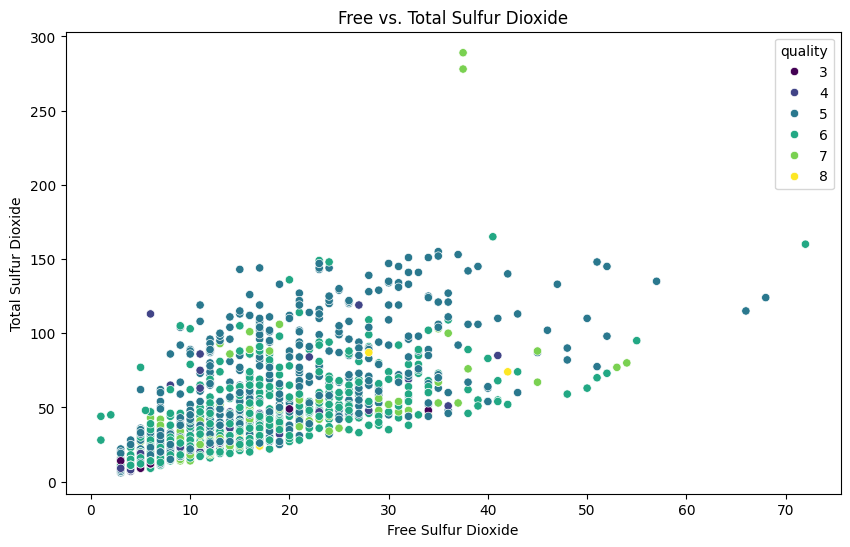

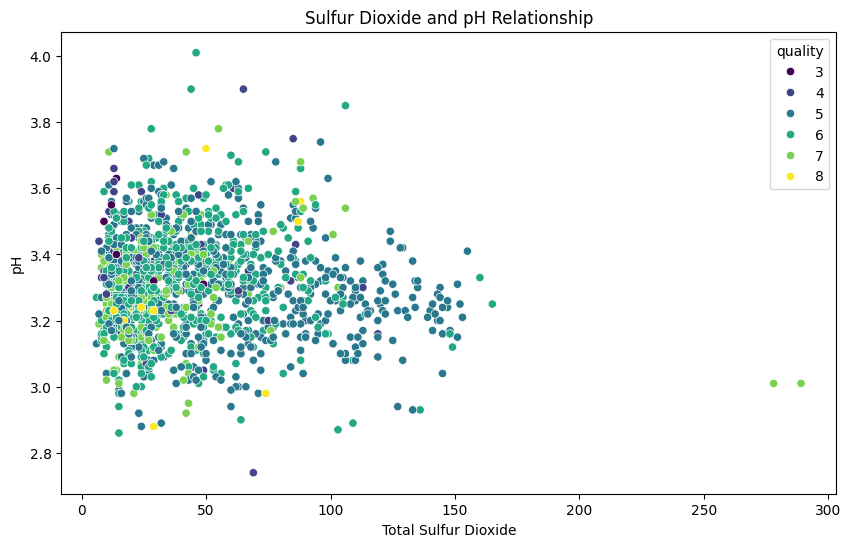

In [118]:
# Free vs. Total Sulfur Dioxide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', data=wine_dataset, palette='viridis')
plt.title('Free vs. Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

# Sulfur Dioxide and pH Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total sulfur dioxide', y='pH', hue='quality', data=wine_dataset, palette='viridis')
plt.title('Sulfur Dioxide and pH Relationship')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('pH')
plt.show()

The first graph shows a positive correlation between free and total sulfur dioxidee. As free sulfur dioxide increases, the total sulfur dioxide also tends to increase but the relationship may not be linear dur to the presence of bound sulphur dioxide.

The second graph shows that the higher levels of total sulfur dioxide are assosciated with lower pH values. there is a noticable clustering of data points at lower total sulfur dioxide levels (0-100) and pH values between (3.0-3.6)

#### 6. Density Analysis

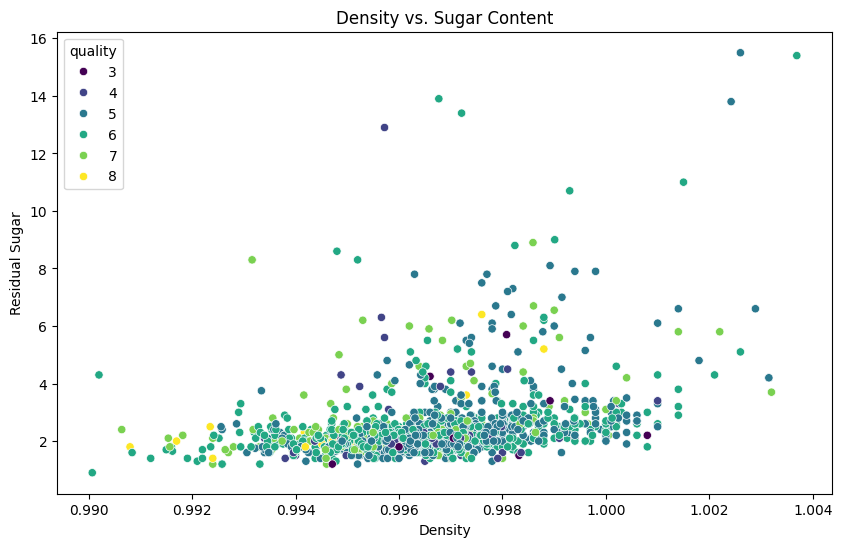

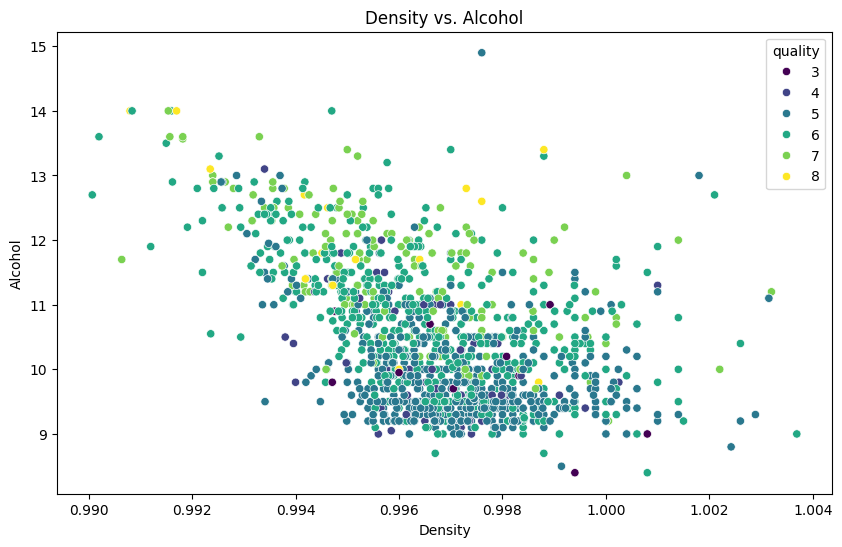

In [119]:
# Density vs. Sugar Content
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='residual sugar', hue='quality', data=wine_dataset, palette='viridis')
plt.title('Density vs. Sugar Content')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

# Density vs. Alcohol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=wine_dataset, palette='viridis')
plt.title('Density vs. Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()

The first plot shows a relative positive correlation between density and residual sugar. As  density increases, residual sugar content also tends to increase.

The second plot shows three is a negative correlation between density and alcohol content as density increases and alcohol content tends to decrease.

#### 7. Feature Engineering

In [120]:
# New Features for Prediction
wine_dataset['acidity_ratio'] = wine_dataset['fixed acidity'] / wine_dataset['volatile acidity']
wine_dataset['sulfur_balance'] = wine_dataset['free sulfur dioxide'] / wine_dataset['total sulfur dioxide']
wine_dataset['sugar_alcohol_ratio'] = wine_dataset['residual sugar'] / wine_dataset['alcohol']

# Display new features
print(wine_dataset[['acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio']].head())


   acidity_ratio  sulfur_balance  sugar_alcohol_ratio
0      10.571429        0.323529             0.202128
1       8.863636        0.373134             0.265306
2      10.263158        0.277778             0.234694
3      40.000000        0.283333             0.193878
5      11.212121        0.325000             0.191489


### Exporting the clean dataset for further analysis

In [121]:
wine_dataset.to_csv("clean_wine_dataset", index=False)

### Further Analysis with clean dataset

In [122]:
#Importing the clean csv file
clean_wine_dataset = pd.read_csv('clean_wine_dataset.csv')

In [123]:
clean_wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  quality_binned        1342 non-null   object 
 13  acidity_ratio         1359 non-null   float64
 14  sulfur_balance        1359 non-null   float64
 15  sugar_alcohol_ratio  

In [124]:
# Assuming your DataFrame is named clean_wine_dataset
clean_wine_dataset = clean_wine_dataset.drop(columns=['quality_binned'])

# To verify the change
print(clean_wine_dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  acidity_ratio  sulfur_balance  sugar_alcohol_ratio  
0      9.4  

#### Columns

In [125]:
categorical_columns = clean_wine_dataset.select_dtypes(include=['object']).columns

# Encode categorical columns with LabelEncoder
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    clean_wine_dataset[column] = label_encoders[column].fit_transform(clean_wine_dataset[column])

# Step 2: Select Numeric Columns
numeric_columns = clean_wine_dataset.select_dtypes(include=['number']).columns

clean_wine_dataset_numeric = clean_wine_dataset[numeric_columns]

# Separate Features and Target
X = clean_wine_dataset.drop(columns=['quality'])  # 'quality' is the target variable
y = clean_wine_dataset['quality']


### Feature Selection Matrix

#### Correlation Matrix

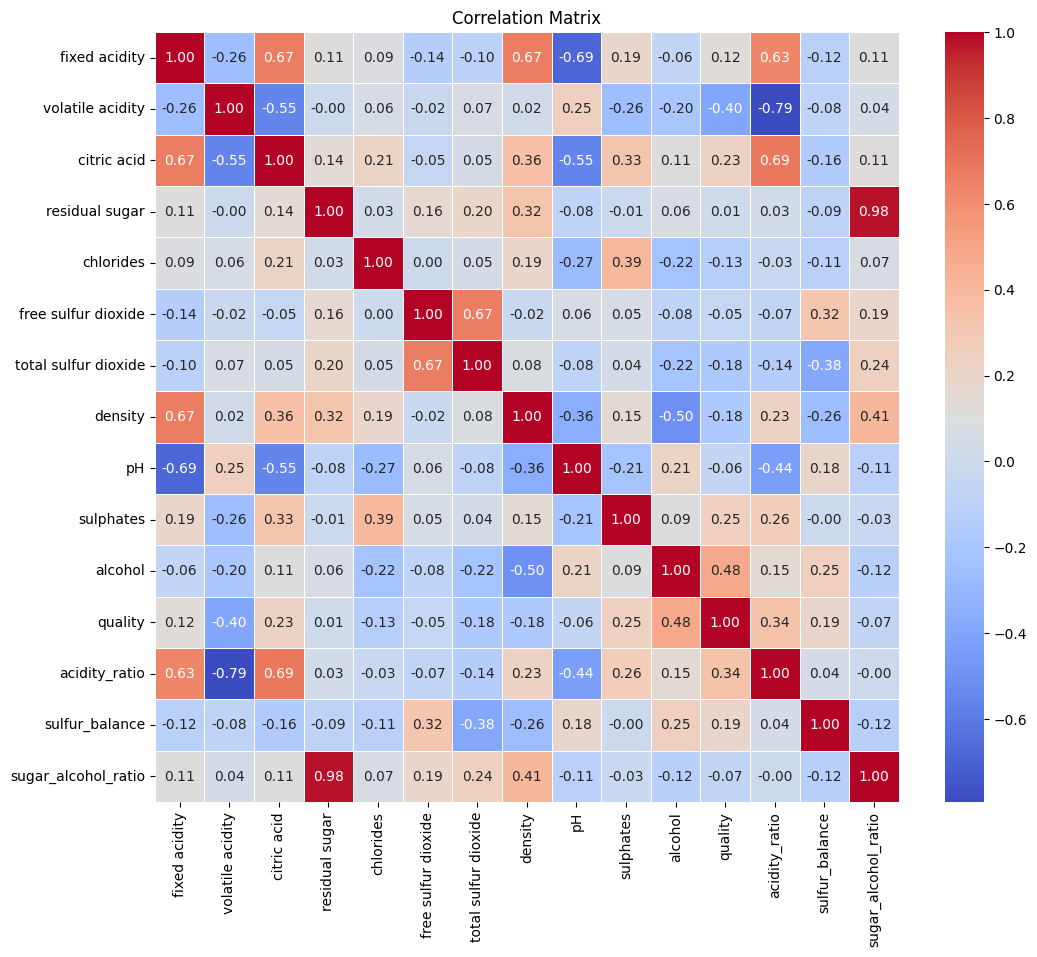

In [126]:
correlation_matrix = clean_wine_dataset.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Chi-Square Test

In [127]:
# Perform the Chi-Square Test
chi2_selector = SelectKBest(chi2, k=10)  # Select the top 10 features
X_new = chi2_selector.fit_transform(X, y)

# Get the Selected Feature Names
selected_feature_names = X.columns[chi2_selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol',
       'acidity_ratio', 'sulfur_balance'],
      dtype='object')


PCA

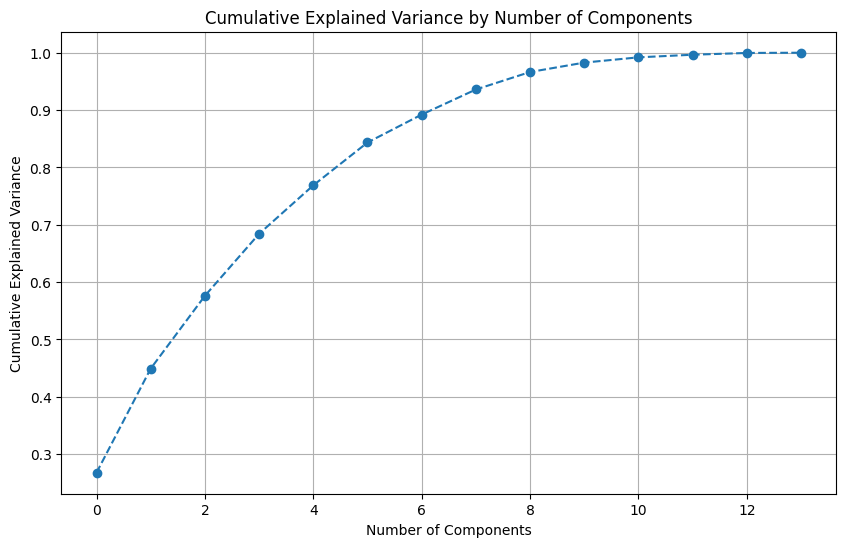

Optimal Number of Components: 9
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.898562  0.670547 -1.405579 -0.600623 -0.236939  0.383568 -0.839989   
1 -1.260436  1.803155 -0.808520  0.676485  0.246622  0.670479  1.065857   
2 -1.078246  1.121166 -1.288191  0.076268  0.009280 -0.034243  0.389678   
3  3.146978 -1.028997 -0.107236  0.334576 -1.895235  0.116389 -0.391050   
4 -1.838047  0.631269 -1.261076 -0.351351 -0.398920  0.391870 -0.917209   

        PC8       PC9  
0  0.657050  0.277892  
1  0.092971 -0.889043  
2  0.135629 -0.632246  
3 -0.282594  0.461654  
4  0.650996  0.301821  


In [128]:
# Drop the Target Column
Xp = clean_wine_dataset_numeric.drop(columns=['quality'])

# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xp)

# Apply PCA
pca = PCA()  # Initialize PCA without specifying the number of components
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

# Determine the Optimal Number of Components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Optimal Number of Components: {optimal_components}")

# Step 9: Apply PCA with the Optimal Number of Components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Step 10: Create a DataFrame with the PCA Components
pca_wine_dataset = pd.DataFrame(X_pca_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_wine_dataset.head())

#### Model Training

In [129]:
# Drop the specified columns
wine_dataset = wine_dataset.drop(columns=['citric acid', 'density', 'acidity_ratio', 'sugar_alcohol_ratio'])

# Display the first few rows to confirm the changes
print(wine_dataset.head())

   fixed acidity  volatile acidity  residual sugar  chlorides  \
0            7.4              0.70             1.9      0.076   
1            7.8              0.88             2.6      0.098   
2            7.8              0.76             2.3      0.092   
3           11.2              0.28             1.9      0.075   
5            7.4              0.66             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 11.0                  34.0  3.51       0.56      9.4   
1                 25.0                  67.0  3.20       0.68      9.8   
2                 15.0                  54.0  3.26       0.65      9.8   
3                 17.0                  60.0  3.16       0.58      9.8   
5                 13.0                  40.0  3.51       0.56      9.4   

   quality quality_binned  sulfur_balance  
0        5         Medium        0.323529  
1        5         Medium        0.373134  
2        5         Medium       

In [130]:
wine_dataset.to_csv("final_wine_dataset.csv", index=False)

In [131]:
clean_wine_dataset= pd.read_csv('final_wine_dataset.csv')

In [132]:
# Identify categorical columns
categorical_cols = clean_wine_dataset.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    clean_wine_dataset[col] = le.fit_transform(clean_wine_dataset[col])
    label_encoders[col] = le  # Store encoder for later use

# Define features (X) and target (y)
X = clean_wine_dataset.drop(columns=['quality'])  # All features except the target
y = clean_wine_dataset['quality']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Train & Evaluate Linear Regression Model ###
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [133]:
# Convert regression predictions to integer labels (rounding)
y_pred_lr_rounded = np.round(y_pred_lr).astype(int)

# Regression Model Evaluation
print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr_rounded))

### 2. Train & Evaluate Random Forest Classifier ###
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Classification Model Evaluation
print("\nRandom Forest Classifier Model Evaluation:")
print(classification_report(y_test, y_pred_rf))

Linear Regression Model Evaluation:
Mean Squared Error: 0.4122809840080297
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.71      0.73      0.72       120
           6       0.60      0.73      0.66       103
           7       0.95      0.68      0.79        31
           8       0.00      0.00      0.00         3

    accuracy                           0.68       272
   macro avg       0.38      0.36      0.36       272
weighted avg       0.65      0.68      0.66       272



d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Classifier Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.73      1.00      0.85        11
           5       0.78      0.73      0.76       120
           6       0.71      0.76      0.73       103
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00         3

    accuracy                           0.78       272
   macro avg       0.70      0.75      0.72       272
weighted avg       0.77      0.78      0.77       272



d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
